In [25]:
# import the packages we need for this assignment
from PIL import Image
from __future__ import division
from scipy.signal import convolve2d
from scipy import signal
from IPython.display import Image as Imag
import numpy as np
import math 

ALL IMAGES MUST BE IN THE SAME DIRECTORY AS THIS NOTEBOOK

# Part 1 : Gaussian Filtering

In [26]:
#1
def boxfilter(n):
    # check the number is odd
    assert (n % 2 != 0),": Dimension must be odd"
    return np.full((n, n), (1/(n*n)))

In [27]:
boxfilter(3)

array([[ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111],
       [ 0.11111111,  0.11111111,  0.11111111]])

In [28]:
boxfilter(4)

AssertionError: : Dimension must be odd

In [29]:
boxfilter(5)

array([[ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04],
       [ 0.04,  0.04,  0.04,  0.04,  0.04]])

In [30]:
#2.
# helper functino for rounding off to odd if even
def round_to_odd(f):
    ans = math.ceil(f)
    if ans % 2 == 0:
        ans = ans +1
    return ans

def gauss1d(sigma):
    # get filter length and round to next odd integer if even
    filter_length = round_to_odd(6 * sigma)
    # edge
    m = math.floor(filter_length/2)
    # x is the distance of an array value from the center
    x = np.arange(-m,m+1)
    filter_values = np.exp(-np.power(x, 2)/(2*sigma**2))
    gaus_filter = filter_values/np.sum(filter_values)
    return gaus_filter

In [31]:
print gauss1d(0.3)
print gauss1d(0.5)
print gauss1d(1)
print gauss1d(2)

[ 0.00383626  0.99232748  0.00383626]
[ 0.10650698  0.78698604  0.10650698]
[ 0.00443305  0.05400558  0.24203623  0.39905028  0.24203623  0.05400558
  0.00443305]
[ 0.0022182   0.00877313  0.02702316  0.06482519  0.12110939  0.17621312
  0.19967563  0.17621312  0.12110939  0.06482519  0.02702316  0.00877313
  0.0022182 ]


In [32]:
# 3.returns a 2D Gaussian filter for a given value of sigma
def gauss2d(sigma):
    onedfilter = gauss1d(sigma)
    two_d_filter = onedfilter[np.newaxis]
    two_d_filter_trans = two_d_filter.T
    twodfilter = convolve2d(two_d_filter,two_d_filter_trans)
    return twodfilter

In [33]:
print gauss2d(.5)
print gauss2d(1)

[[ 0.01134374  0.08381951  0.01134374]
 [ 0.08381951  0.61934703  0.08381951]
 [ 0.01134374  0.08381951  0.01134374]]
[[  1.96519161e-05   2.39409349e-04   1.07295826e-03   1.76900911e-03
    1.07295826e-03   2.39409349e-04   1.96519161e-05]
 [  2.39409349e-04   2.91660295e-03   1.30713076e-02   2.15509428e-02
    1.30713076e-02   2.91660295e-03   2.39409349e-04]
 [  1.07295826e-03   1.30713076e-02   5.85815363e-02   9.65846250e-02
    5.85815363e-02   1.30713076e-02   1.07295826e-03]
 [  1.76900911e-03   2.15509428e-02   9.65846250e-02   1.59241126e-01
    9.65846250e-02   2.15509428e-02   1.76900911e-03]
 [  1.07295826e-03   1.30713076e-02   5.85815363e-02   9.65846250e-02
    5.85815363e-02   1.30713076e-02   1.07295826e-03]
 [  2.39409349e-04   2.91660295e-03   1.30713076e-02   2.15509428e-02
    1.30713076e-02   2.91660295e-03   2.39409349e-04]
 [  1.96519161e-05   2.39409349e-04   1.07295826e-03   1.76900911e-03
    1.07295826e-03   2.39409349e-04   1.96519161e-05]]


In [34]:
# 4.a)
def gaussconvolve2d(array,sigma):
    # use previously defined gauss2d filter to get a gauss2d filter
    filter = gauss2d(sigma)
    gaussconvolve2d = signal.convolve2d(array, filter, 'same')
    return gaussconvolve2d

Q:Why does Scipy have separate functions ‘signal.convolve2d’ and ‘signal.correlate2d’? 
A:Convolution is correlaion with the filter rotated 180 degrees. If the the filter is symmetric for example a Gaussian it does not make a difference however for filters that are not symmetric such as a derivative it makes a difference. Also,convolution is associative while,correlation in general is not. The associativity of convolution allows filters to be convolved together which is convenient and often more efficient.


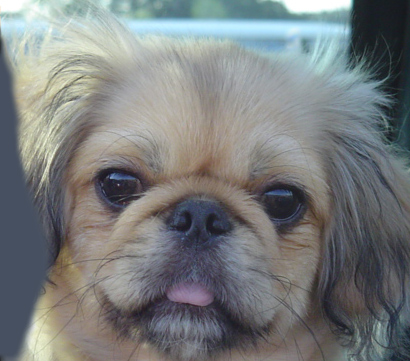

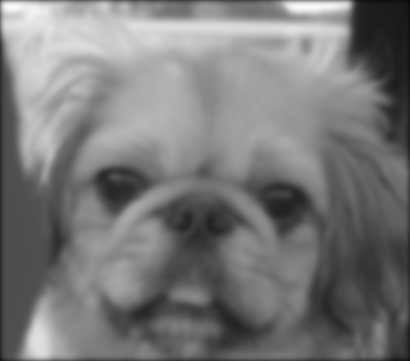

In [35]:
# 4.b)
def apply_gauss2d(name):
    im = Image.open(name)
    # display original image 
    display(Imag(filename='dog.jpg'))
    im.show()
    # change to greyscale   
    im2_array = np.asarray(im.convert('L'))
    filtered_image = gaussconvolve2d(im2_array,3)
    # convert the array back to a unit8 array so we can write to a file
    filtered_arr = filtered_image.astype('uint8')
    # convert the numpy array back to a PIL image and save
    new_im = Image.fromarray(filtered_arr)
    new_name = name + 'gauss2d.png'
    new_im.save(new_name, 'PNG')
    new_im.show()
    display(Imag(filename=new_name))
apply_gauss2d('0b_dog.bmp')

Convolution with a 2D Gaussian filter takes m^2 x n^2 multiplications but it can be made more efficient by expressing it as a product of separate x and y function.
This results in 2m x n^2 multiplications because at each pixel there are 2m multiplications and there are nxn pixels in (X,Y).

# Part-2 Hybrid Images

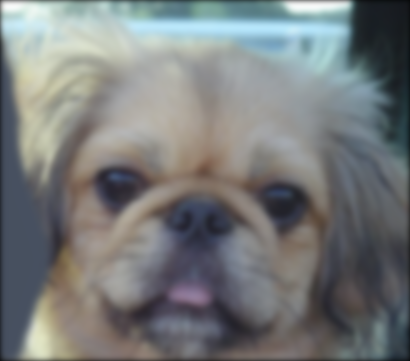

array([[[  81.83964291,   81.79773055,   81.74591175],
        [ 100.04132308,  100.00251961,   99.9534427 ],
        [ 115.45000197,  115.41874707,  115.37711401],
        ..., 
        [  11.15668394,   13.29908973,   14.97252179],
        [   9.85577852,   11.84911657,   13.20033694],
        [   8.20090168,    9.96021151,   10.98885653]],

       [[ 100.01412204,   99.93188914,   99.82414685],
        [ 122.26165604,  122.1866679 ,  122.08400774],
        [ 141.09650185,  141.03747374,  140.94960419],
        ..., 
        [  13.72706452,   16.19122705,   18.33862732],
        [  12.12520025,   14.42618631,   16.17468945],
        [  10.08729323,   12.12649556,   13.46898458]],

       [[ 115.35700197,  115.21966088,  115.01619637],
        [ 141.02277088,  140.90311706,  140.7074842 ],
        [ 162.75295977,  162.66660147,  162.49679721],
        ..., 
        [  15.95490788,   18.59877589,   21.19594854],
        [  14.09482031,   16.57035725,   18.70485696],
        [  11.72606

In [36]:
# 1. Choosing an appropriate sigma and create a blurred image
def create_low_freq(name,sigma):
#   original image
    og_im = Image.open(name)
#   image as array  
    im2_array = np.asfarray(og_im)
#   normalize  
    im2_array /= im2_array.max() / 255.0
#   separate channels
    r = im2_array[:, :, 0]
    g = im2_array[:, :, 1]
    b = im2_array[:, :, 2]
#   apply gaussconvolve to each channel
    r_gauss = gaussconvolve2d(r,sigma)
    g_gauss = gaussconvolve2d(g,sigma)
    b_gauss = gaussconvolve2d(b,sigma)
#   add 3rd dimension  
    r_new = r_gauss[:,:,np.newaxis]
    g_new = g_gauss[:,:,np.newaxis]
    b_new = b_gauss[:,:,np.newaxis]
#   concatenate the separate channels
    low_filter = np.concatenate((r_new,g_new,b_new),axis=2)
    og_im_array = low_filter.astype('uint8')
    og_low_im = Image.fromarray(og_im_array)
    new_name = name + "blur.png"
    og_low_im.save(new_name, 'PNG')
    display(Imag(filename=new_name))
    og_low_im.show()
    return low_filter
create_low_freq('0b_dog.bmp',3)

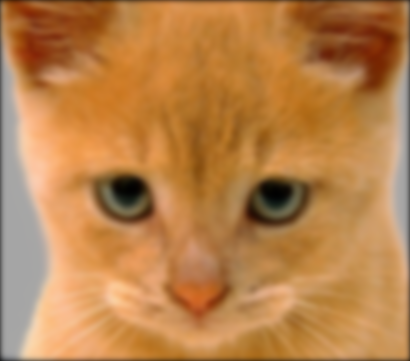

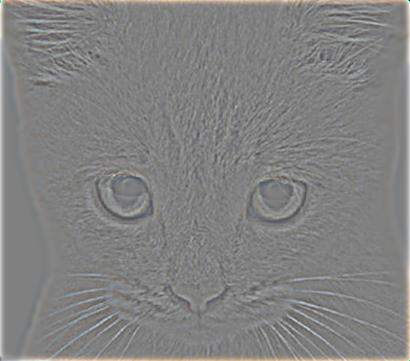

array([[[ 144.28340566,  123.9872526 ,   91.01722593],
        [ 121.95686649,   97.2574971 ,   62.71378928],
        [ 100.44684236,   72.32964332,   32.89229916],
        ..., 
        [ 117.99915657,  101.27081501,   87.846319  ],
        [ 136.48831342,  121.48970728,  110.88908956],
        [ 151.9053212 ,  137.6909362 ,  128.98049949]],

       [[ 138.84153649,  122.78613737,   98.28681755],
        [ 111.72326803,   94.23901329,   67.12440501],
        [  87.10379776,   63.19177606,   36.1056423 ],
        ..., 
        [  98.02289662,   84.96079076,   75.32264019],
        [ 117.82282814,  107.79046804,   98.2729082 ],
        [ 138.21015157,  126.27746297,  116.95291868]],

       [[ 134.31171681,  120.83037007,  103.09011154],
        [ 104.78625943,   88.66195252,   70.09914184],
        [  74.36698348,   57.6228289 ,   39.86751544],
        ..., 
        [  81.1584469 ,   72.0935563 ,   65.74132182],
        [ 103.89870082,   95.28931513,   88.46077709],
        [ 127.78943

In [37]:
# Choosing a sigma and create high frequency image
def create_hi_freq(name,sigma):
#   Get the low frequency image  
    low_freq = create_low_freq(name,sigma)
    og_im = Image.open(name)
    og_array = np.asfarray(og_im)
#   get the high frequency image by subtracting low frequency from the original image  
    im_high = og_array - low_freq
    im_h = im_high.astype('uint8')
    im_hnew = im_h + 128
    im_hnew = np.clip(im_hnew, 0, 255)
    im_high_im = Image.fromarray(im_hnew)
    new_name = name + "hi_freq.png"
    im_high_im.save(new_name, 'PNG')
    display(Imag(filename=new_name))
    im_high_im.show()
    return im_high
create_hi_freq('0a_cat.bmp',3)

In [38]:
# 3 Creating hybrid images
def create_hybrid(img_1,img_2,sigma):
    hybrid = create_low_freq(img_2,sigma) + create_hi_freq(img_1,sigma)
    hybrid = np.clip(hybrid, 0, 255)
    hybrid_arr = hybrid.astype('uint8')
    im_hybrid = Image.fromarray(hybrid_arr)
    new_name = "hybrid_image.png"
    im_hybrid.save(new_name, 'PNG')
    display(Imag(filename=new_name))

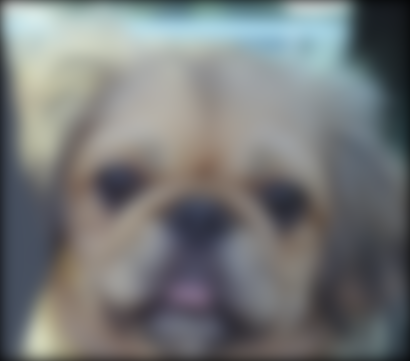

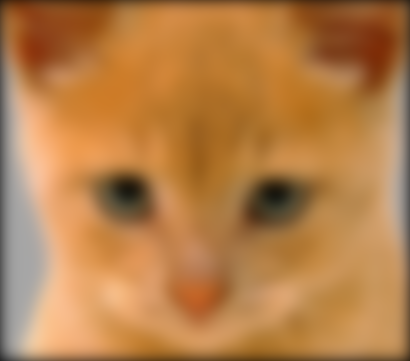

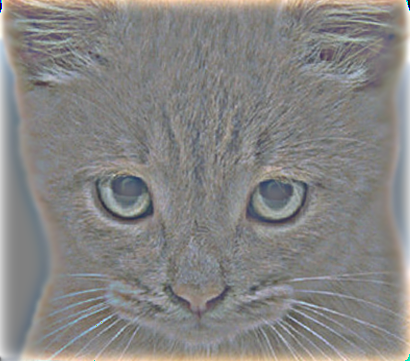

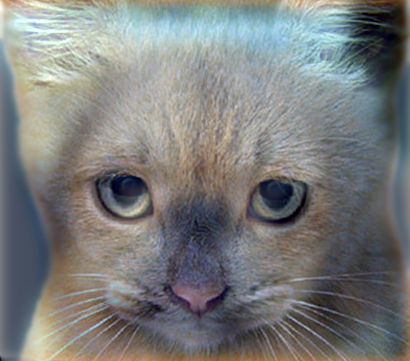

In [39]:
create_hybrid('0a_cat.bmp','0b_dog.bmp',8)

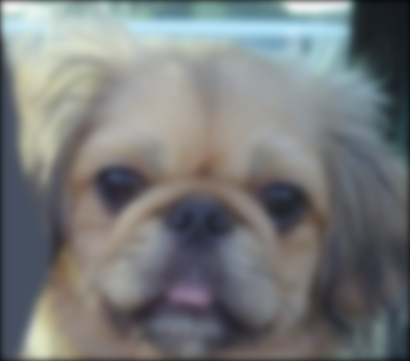

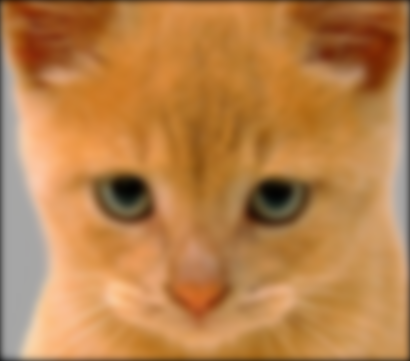

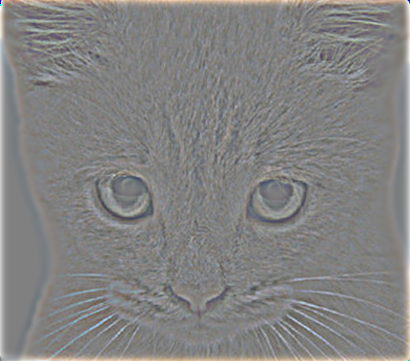

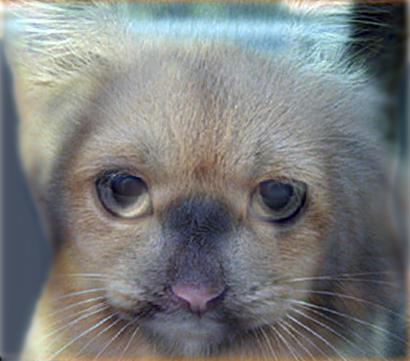

In [40]:
create_hybrid('0a_cat.bmp','0b_dog.bmp',4)

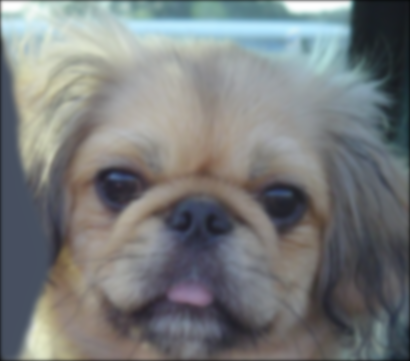

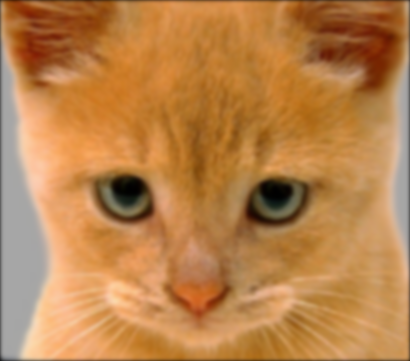

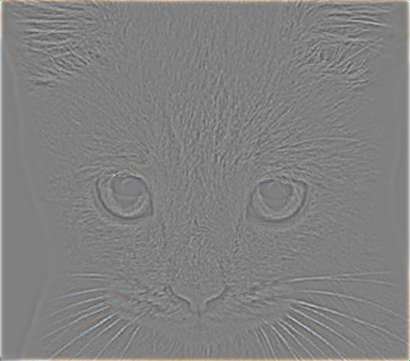

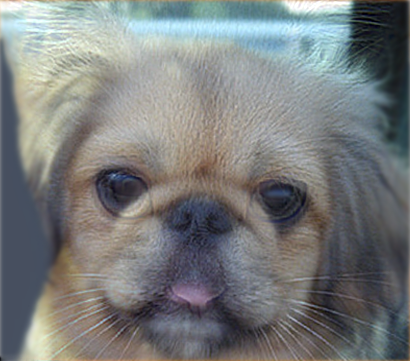

In [41]:
create_hybrid('0a_cat.bmp','0b_dog.bmp',2)

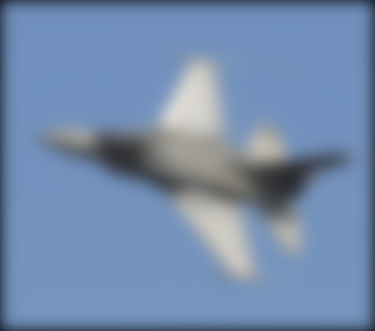

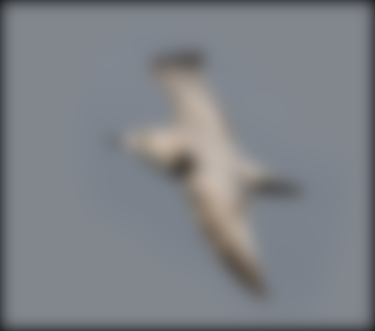

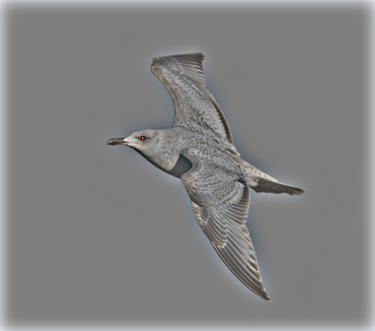

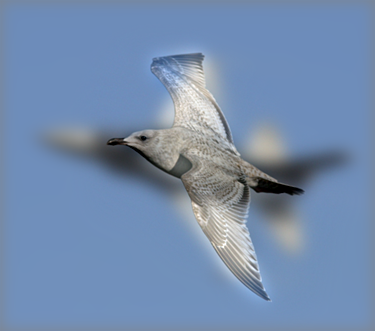

In [42]:
create_hybrid('4a_bird.bmp','4b_plane.bmp',8)

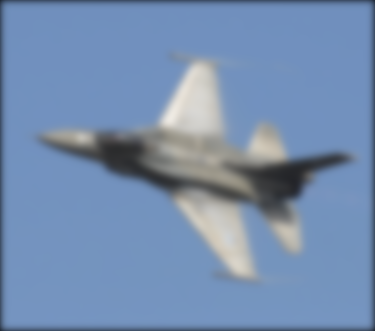

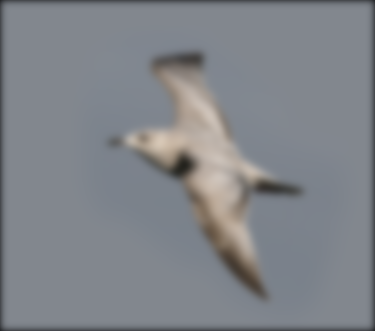

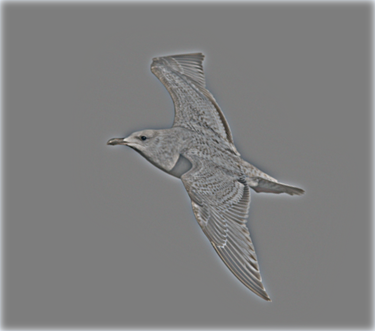

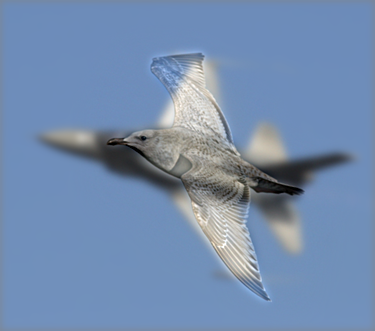

In [43]:
create_hybrid('4a_bird.bmp','4b_plane.bmp',4)

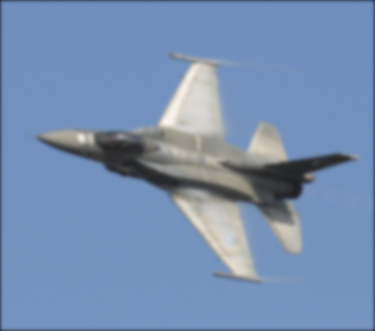

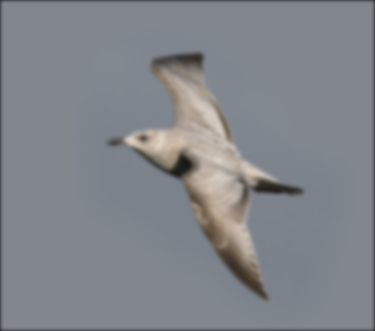

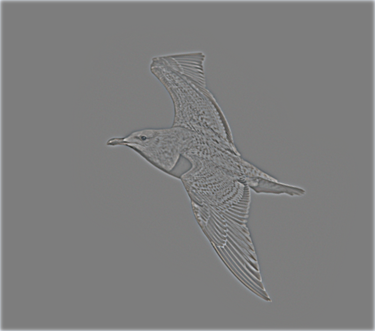

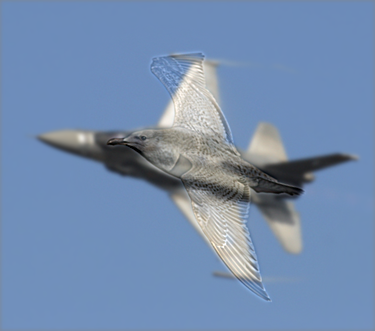

In [44]:
create_hybrid('4a_bird.bmp','4b_plane.bmp',2)

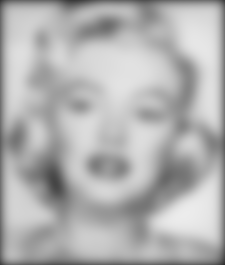

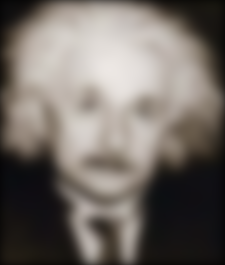

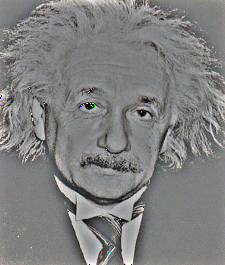

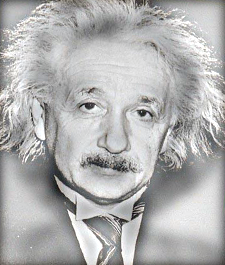

In [45]:
create_hybrid('2a_einstein.bmp','2b_marilyn.bmp',6)

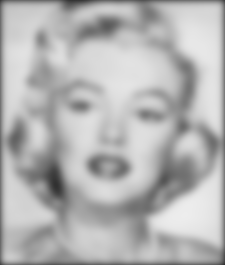

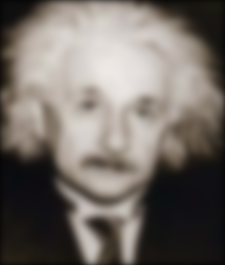

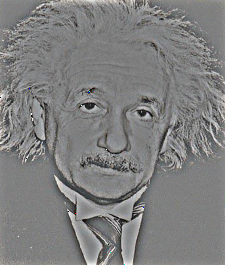

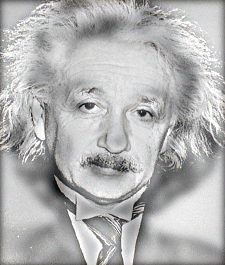

In [46]:
create_hybrid('2a_einstein.bmp','2b_marilyn.bmp',4)

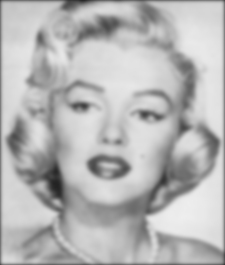

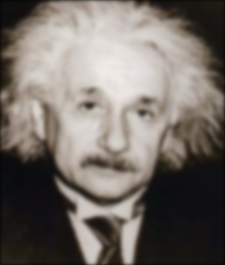

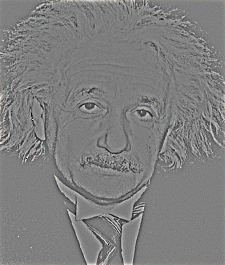

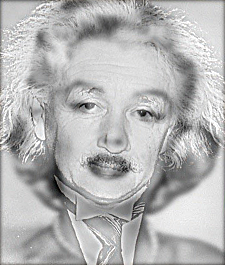

In [47]:
create_hybrid('2a_einstein.bmp','2b_marilyn.bmp',2)